# **Random Forest Regression**

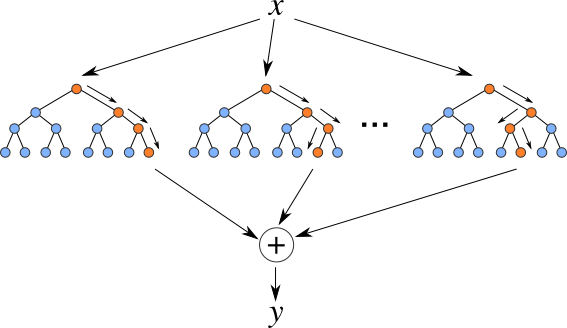

## ***IMPORTING LIBRARIES***

In [71]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [72]:
data = pd.read_csv("CarPrice.csv")
data = data.drop(["car_ID"],axis=1)

## ***SUMMARIZING THE DATASET***

In [73]:
print(data.shape)
print(data.head())

(205, 25)
   symboling                   CarName fueltype  ... citympg highwaympg    price
0          3        alfa-romero giulia      gas  ...      21         27  13495.0
1          3       alfa-romero stelvio      gas  ...      21         27  16500.0
2          1  alfa-romero Quadrifoglio      gas  ...      19         26  16500.0
3          2               audi 100 ls      gas  ...      24         30  13950.0
4          2                audi 100ls      gas  ...      18         22  17450.0

[5 rows x 25 columns]


## ***SEGREGATING THE DATASET INTO INPUT AND OUTPUT***

In [74]:
input  = data.drop(["price"],axis=1)
input  = input.select_dtypes(exclude=["object"]).columns
input  = data[input]
print(input)

output = data["price"]
print(output)

     symboling  wheelbase  carlength  ...  peakrpm  citympg  highwaympg
0            3       88.6      168.8  ...     5000       21          27
1            3       88.6      168.8  ...     5000       21          27
2            1       94.5      171.2  ...     5000       19          26
3            2       99.8      176.6  ...     5500       24          30
4            2       99.4      176.6  ...     5500       18          22
..         ...        ...        ...  ...      ...      ...         ...
200         -1      109.1      188.8  ...     5400       23          28
201         -1      109.1      188.8  ...     5300       19          25
202         -1      109.1      188.8  ...     5500       18          23
203         -1      109.1      188.8  ...     4800       26          27
204         -1      109.1      188.8  ...     5400       19          25

[205 rows x 14 columns]
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201   

## ***FEATURE SCALING***

In [75]:
from sklearn.preprocessing import scale

scaled_input = scale(input)

scaled_input

array([[ 1.74347043, -1.6907718 , -0.42652147, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 1.74347043, -1.6907718 , -0.42652147, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.133509  , -0.70859588, -0.23151305, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.68328649,
         0.11959362, -0.54605874],
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.57769233,
        -0.95301169, -0.83719538]])

## ***SPLITTING THE DATASET INTO TRAIN AND TEST DATA***

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_input,output)

## ***TRAINING THE DATASET***

In [77]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regression_Model = RandomForestRegressor()

Random_Forest_Regression_Model.fit(x_train,y_train)

RandomForestRegressor()

## ***PREDICTING THE OUTPUT USING THE TRAINED MODEL***

In [78]:
X = [2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10,102,5500,24,30]
X = scale(X)

print(Random_Forest_Regression_Model.predict([X]),"IS THE PRICE OF THE CAR FOR THE GIVEN FEATURE VALUES")

[14823.745] IS THE PRICE OF THE CAR FOR THE GIVEN FEATURE VALUES


## ***CALCULATING THE ACCURACY OF THE TRAINED MODEL***

In [79]:
y_pred = Random_Forest_Regression_Model.predict(x_test)
y_pred

array([ 7791.27      , 13129.935     ,  9564.75      , 36006.415     ,
       31737.68      ,  8568.59      ,  9367.91      ,  5916.02875   ,
       10002.62      , 18580.69      , 10180.65      , 14893.60501   ,
       13790.93      , 10549.48      , 14697.73      , 16228.31501   ,
       14142.63501   ,  6960.3025    ,  9240.8       , 10171.04      ,
        7941.        ,  8169.80583333, 15865.85      ,  9966.15      ,
       17658.51501   ,  7559.06      ,  7129.10666667, 13263.18      ,
        8228.39      ,  6609.45      , 12141.585     ,  6908.7       ,
        7040.75875   ,  5763.705     , 17929.89      ,  6609.45      ,
        9094.84      , 15315.84334   ,  9365.015     , 13976.91334   ,
       14174.52      , 15648.43833333, 14847.01833333,  7983.1       ,
       15141.93      , 13360.5975    , 33050.05642857, 15152.89167   ,
        6468.25916667,  9024.235     ,  8169.80583333,  7186.28916667])

In [80]:
from sklearn.metrics import r2_score

print("r2_score:",r2_score(y_test,y_pred)*100,"%")

r2_score: 91.0955941021423 %
